In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph


In [5]:
def f(x):
    return 3*x**2 - 4*x +5

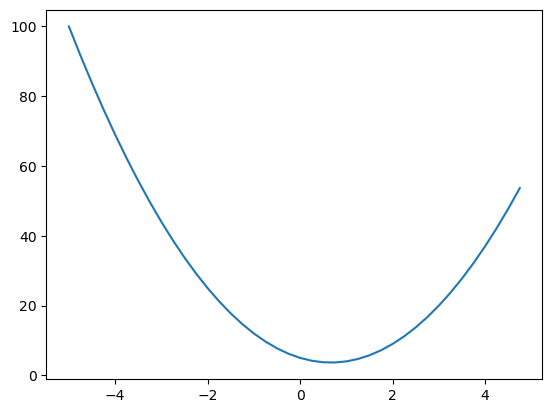

In [6]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [16]:
h = 0.00000001
x = 3.0
(f(x+h) - f(x))/h

14.00000009255109

In [18]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
d

4.0

In [19]:
h = 0.0001

# inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [20]:
h = 0.0001

# inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [99]:
h = 0.0001

# inputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [100]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self,other):
        return Value(self.data * other.data, (self, other), '*')

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1) / (math.exp(2*x) +1)
        return Value(t, (self,), 'tanh')

In [101]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d*f
L.label = 'L'
L

Value(data=-8.0)

In [102]:
d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

In [103]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

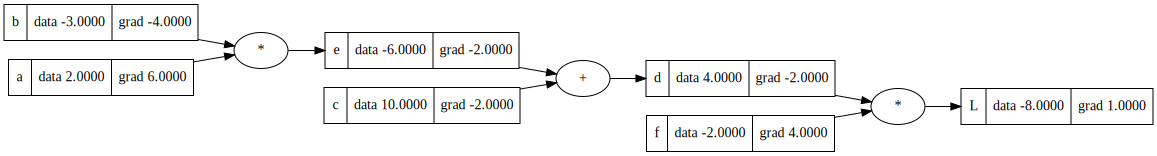

In [106]:
draw_dot(L)

In [105]:
# manual backprop
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = 1.0 * d.grad 
e.grad = 1.0 * d.grad
a.grad = -3.0 * -2.0
b.grad = 2.0 * -2.0


In [107]:
# a forward pass
# this show that if we increase a by delta
# L changes positively

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f
L

Value(data=-7.286496)

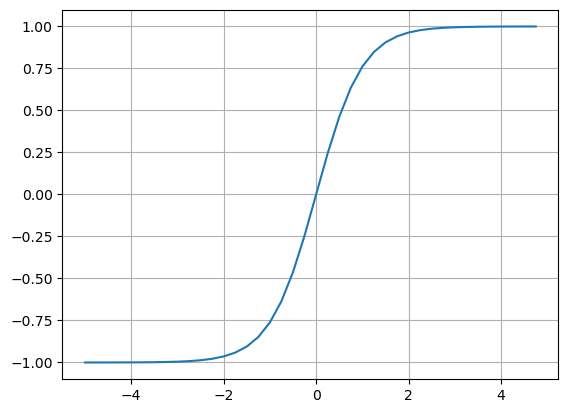

In [108]:
plt.plot(np.arange(-5,5,0.25),np.tanh(np.arange(-5,5,0.25)));plt.grid();

In [ ]:
# simple neural network